- ##### Titanic Project


- ###### Problem Statement:

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [33]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score


In [2]:
# READING THE DATASET

data=pd.read_csv("titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- As we can see this Titanic dataset is all about ‘Unsinkable’ ship Titanic. We need to predict each of the listed traveler would survive or not basis on 10 different factors/independent variable. The Survived is denoted as '1' and unsurvived is denoted as '0' So this is a Classification type of a problem. In this dataset 2 of the features,'Age' and 'Fare' are containing Floats, 4 of the features 'Pclass','SipSp','Parch','PassengerId' are containing integers. And 5 of the features containing objects(Name,Sex,Ticket,Cabin,Embarked).

Let's now check the Shape of the data:

In [3]:
data.shape

(891, 12)

- Dataset contains 891 rows and 12 columns.

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- The 12 columns of this dataset are,
'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin' and 'Embarked'.

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- As we already have noticed that 2 columns are float,5 columns are integer and 5 columns are object data type.

In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There is 177 missing values in Age column, 687 missing values in Cabin column and 2 missing values in Embarked column. We need to impute those values if needed.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- We can see that there are 5 columns of nominal values, we need to convert those if needed and we can also see that the features have widely different ranges, that we will need to convert into roughly the same scale. We have already spoted some features containing missing values, that wee need to deal with.



Let's check the statistics of the dataset:

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- As we can se the count of each column should be 891 values, but Age has 714 values(as .describe() method only show the numerical or descrete data, Age is visibly having null values, but We have already noticed that Cabin and embarked  columns are also having null values).
- 38% people survived in Titanic as we can see the survibed column.
- Age of people travelling in Titanic ranges from 0.4 to 80.
- Minimum fare is showing 0.00000 ,it's not possible ,there maybe some skewness present. We will check it later.

- ##### Data Analysis: 
 
 Let's take more detail look into the features, relations between them, relation between feature Vs target by analysing the data more precisly.



- ##### Univariate Analysis:

 Let's start analysing with the target data i.e. Survived.

In [9]:
# Checking the Lable column to understand the dataset is balanced or not.

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

- As we can understand by seeing the table is that Unsurvived count is denoted as '0', and the count is 549, and Survived count is denoted as '1' and the count is 342. So we can say the Target is imbalanced, as the difference is big. We need to deal with it.

<AxesSubplot:xlabel='Survived', ylabel='count'>

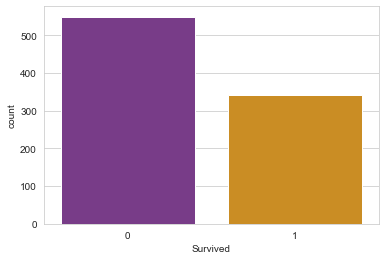

In [10]:
sns.set_style('whitegrid')
sns.countplot(data['Survived'],palette='CMRmap')

- We can see there is a big gap between survived and unsurvived data.



- Let's analyse different categorical Features one by one first:

In [5]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

- As we can see There are 3 different types of passenger class present and each counts differently. Class 3 is having 491 counts, class 1 is having 216 counts and Class 2 is having 184 counts. It means people travelling in Class 3 is more than class 1 and class 2. 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

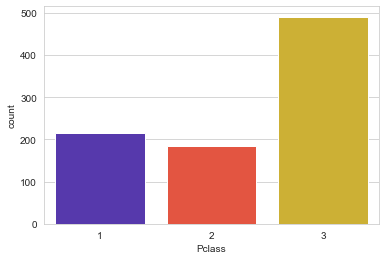

In [11]:
sns.set_style('whitegrid')
sns.countplot(data['Pclass'],palette='CMRmap')

- By seeing above graph we can say that, class 3 passengers were more in numbers than class 1 and class 2. And class 1 passengers a little more than in counts than class 2 passengers. 


Now let's check the Male female ratio as well:

In [6]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

- So there were 577 male passengers and 314 female passengers, who were travelling by Titanic.

<AxesSubplot:xlabel='Sex', ylabel='count'>

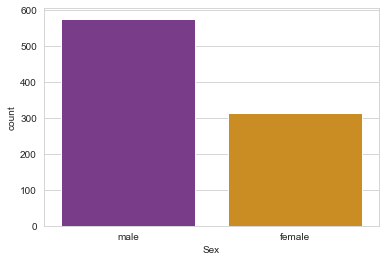

In [12]:
sns.set_style('whitegrid')
sns.countplot(data['Sex'],palette='CMRmap')

- As we can see more numbers of male traveller than female traveller.

In [7]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

- The above table shows the total number of relatives(Siblings or spouses or maybe other relatives), a person has on the Titanic.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

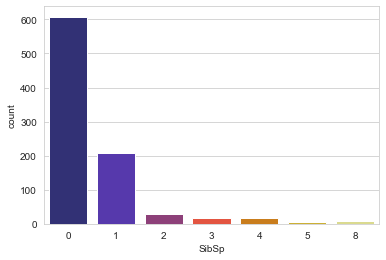

In [8]:
sns.set_style('whitegrid')
sns.countplot(data['SibSp'],palette='CMRmap')

- By seeing the Sibsp data we can say some people were travelling alone and some other people were travelling with their family and friends.

In [11]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

- As we can see 678 people were travelling alone where as 118 people were in pair and rest travelling with friends and family.

<AxesSubplot:xlabel='Parch', ylabel='count'>

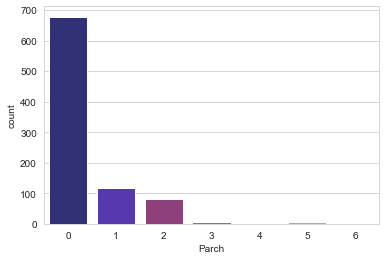

In [9]:
sns.set_style('whitegrid')
sns.countplot(data['Parch'],palette='CMRmap')

- Single travellers were more in numbers than people who were travelling with parents and spouses.

Now let's check the Continuous data as well:

In [12]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- As we can see the minimum age of person who was travelling by Titanic was 0.42 where as maximum age of a passenger was 80. 

<AxesSubplot:>

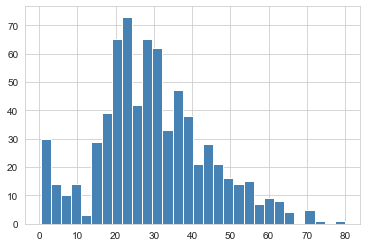

In [14]:
data['Age'].hist(bins=30,color='steelblue')

- As we can see new adults were more in numbers than children and above 50-adults. Maybe there is some skewness present we will deal with it as well. 

In [3]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

- As we can see it's showing minimum fare was 0.000000, but it is not possible. So, there may be some skewness in fare column. And another thing is 75% of fare is 31 it means people who were travelling lower classes are more in number than upper class passengers. As maximumum fare is 512. Or may be there is some skewness also that we need to deal with.

<AxesSubplot:>

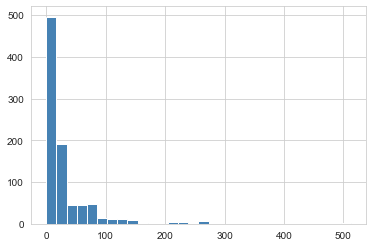

In [15]:
data['Fare'].hist(bins=30,color='steelblue')

- The graph is showing the same as we have seen in the distribution table of Fare.

- ##### Bivariate Analysis:
 
 Now it's time to check relations between feature vs target as well:
 
 Let's check the relation of Sex with respect to survived as it will clear some doubts:

<AxesSubplot:xlabel='Survived', ylabel='count'>

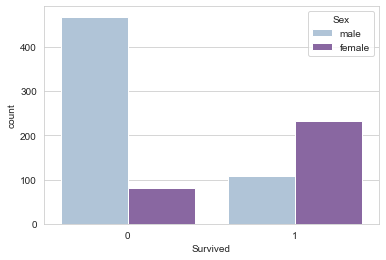

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='BuPu')

- As we can see Survival rate of female is more than male passengers. As we already have seen 38% of passengers were survived, now we can say female counts were more regarding survival.


Let's check the relation between Pclass with Survived:

<AxesSubplot:xlabel='Pclass', ylabel='count'>

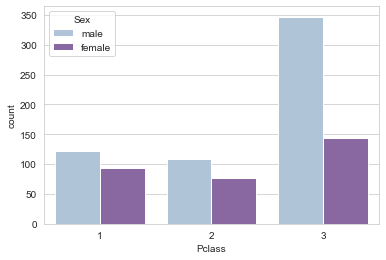

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass',hue='Sex',data=data,palette='BuPu')

- As we can say more than 320 male Class 3 passengers were not survived. And unsurvived female passengers of class 3 were more in numbers than class 1 females and class 2 females.

Let's check the relation between SibSp with Survived:

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

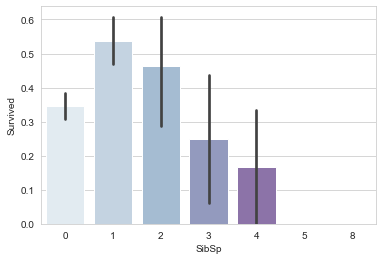

In [7]:
sns.set_style('whitegrid')
sns.barplot(x='SibSp',y='Survived',data=data,palette='BuPu')

- passengers with one sibling or partner more likely to survive than people who were tavelling alone or travelling with more than 2 persons.


Let's check the relation between features also (Pclass Vs fare):

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

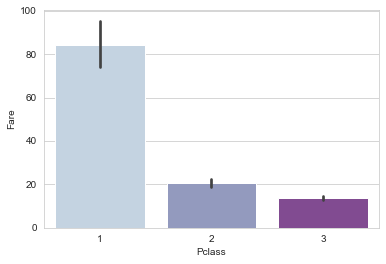

In [12]:
sns.set_style('whitegrid')
sns.barplot(x='Pclass',y='Fare',data=data,palette='BuPu')

- As we can see fares for pclass 1 was more than 80 whereas fares for pclass 2 were more or less 20 and fare for pclass 3 were more or less 10. So, that ship was sailing with various socio-economic group.

Let's check relation between Pclass and Age:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

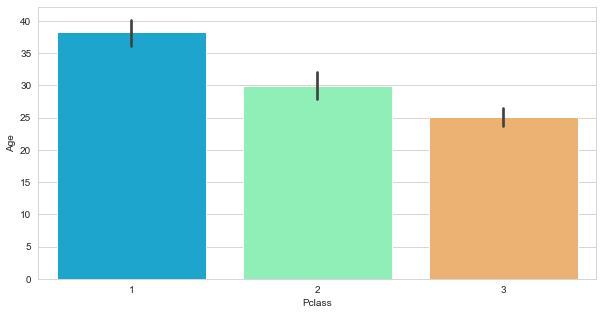

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='Pclass',y='Age',data=data,palette='rainbow')

- As we can see elderly passengers were more likely to travel by Pclass 1, whereas late 20 passengers were travelling by Pclass 2 where and mid 20 passengers were more in numbers in Pclass 3.

Now its time to check relation between continuous varible 'Age' with target 'Survived':

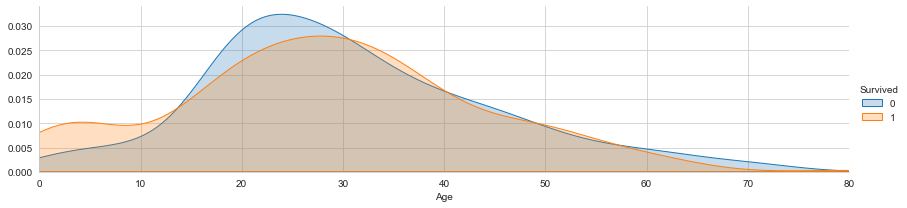

(10.0, 50.0)

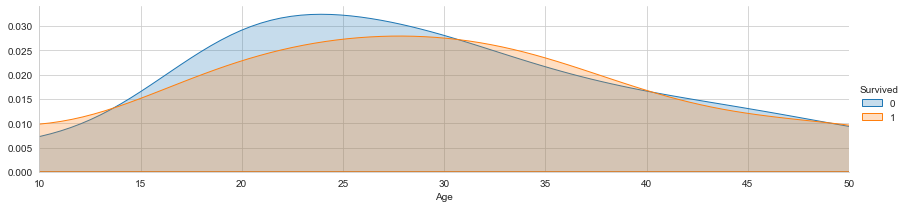

In [18]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)

- As we can see people who were in their early 20s or mid 20s, more likely not survive. Whereas aged passengers might be survived by any means.

- ##### Multivariate Analysis:

- ###### Plotting heatmap (correlation matrix):

Let's try to see if we can reduce the features using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity. But before that we need to drop passenger Id as it's not important for the prediction


In [15]:
data.drop('PassengerId',axis=1,inplace=True) #deleting the column

In [17]:
corr=data.corr()
corr.shape

(6, 6)

- There are 5 features those containing either floats or integers and one target that contains integers, and we are going to check their relations.:

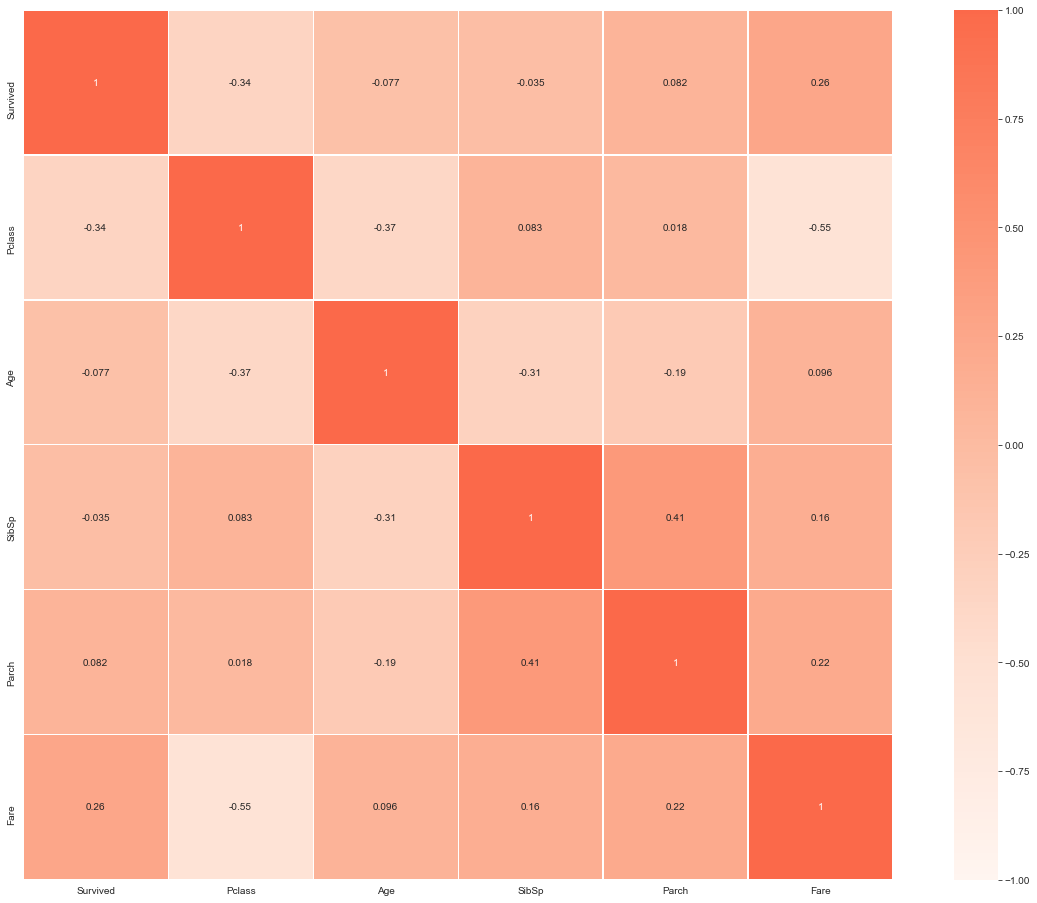

In [18]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- As we can see there may be correlation between Pclass and Fare. But one is categorical and one is continuous so we can't drop any of them basis on their correlation.

- ##### Data Cleaning:

Now it's time to clean the data as there are so many null values present and there maybe presence of skewness in continuous variables as well:

In [3]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

- It's seems like some categorical data is having skewness but it's not possible because they are having categories not continuous data. We can only clear skewness from continuous columns('Age','fare').

But first impute those missing values of Age by using mean of that column.

In [19]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [20]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- As we can see there is no missing value present in 'Age' column. And as the column Cabin is having huge number of missing value, we are going to drop it.

In [21]:
data.drop('Cabin',axis=1,inplace=True) #drop alert
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


- As we can see there is no column named Cabin.

In [24]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

- Now only Embarked column has 2 missing values, let's drop those values.

In [23]:
data.dropna(inplace=True)    #dropping 2 missing values of Embarked column

- Now it's time to convert the nominal data i.e Sex into numerical data, for that we are using get_dummies encoder by pandas library.

In [25]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [26]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now before concatination of the sex column we are going to drop those Nominal columns first that are not related to predicting the survival of passenger.

In [28]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True) #drop alert

In [29]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


- As we can see there is no nominal data present in the cleaned dataset.
Now we are going to concatinate Sex column.

In [31]:
data=pd.concat([data,sex],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


- As we can see get_dummies encoder encoded the sex column.


Now it's time to remove the skewness from the continuous variable as well. For that we are using Power Transformer.

In [18]:
features =['Age','Fare']

In [20]:
scaler=PowerTransformer(method='yeo-johnson')   #using yeo-johnson method of power transformer

In [21]:
data[features]=scaler.fit_transform(data[features].values)

In [22]:
data[features]

,Age,Fare
0,-0.554560,-0.876580
1,0.661897,1.341242
2,-0.239235,-0.787660
3,0.441937,1.071865
4,0.441937,-0.772006
...,...,...
886,-0.161749,-0.291687
887,-0.797488,0.532081
888,0.044995,0.292836
889,-0.239235,0.532081


- As we can see continuous features are scaled and skewness is removed.

- Now it's time to divide the data into features(x) and target(y).

In [23]:
y=data['Survived']
x=data.drop(columns=['Survived'])

- As we have seen there is imbalance in target data. So, we need to balance the data before model train. For that we are using SMOTE.

In [24]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [25]:
y.value_counts()

1    549
0    549
Name: Survived, dtype: int64

- Now the Survived data is balanced.

- Now let's scale the feature data and create the best model.

In [57]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

- ##### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split)to gauge how well the classifier is working.

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#### Model Creation:
We are going to build 6 different models. Those are,

- Logistic Regression
- Decision Tree Classifier 
- Random Forest Classifier
- K-Neighbors Classifier
- Support Vector Classifier
- Gradient Boosting Classifier

Now let's see how good are the models going to work:

- ##### Logistic Regression:

In [59]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")
      


=======================Train Result===========================
Accuracy score:79.71%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.785047    0.810127  0.797084    0.797587      0.797602
recall       0.817518    0.776699  0.797084    0.797109      0.797084
f1-score     0.800954    0.793061  0.797084    0.797007      0.797002
support    411.000000  412.000000  0.797084  823.000000    823.000000
________________________________________________________________
 Confusion Matrix:
[[336  75]
 [ 92 320]]



In [60]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")      
      


=======================Test Result of LR ===========================
Accuracy score:79.64%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.792857    0.800000  0.796364    0.796429      0.796416
recall       0.804348    0.788321  0.796364    0.796334      0.796364
f1-score     0.798561    0.794118  0.796364    0.796339      0.796347
support    138.000000  137.000000  0.796364  275.000000    275.000000
________________________________________________________________
 Confusion Matrix:
[[111  27]
 [ 29 108]]



- The Accuracy Score of Logistic Regression is 79.64%



Let's plot the Confusion matrix of Logistic Regression for Visualization:

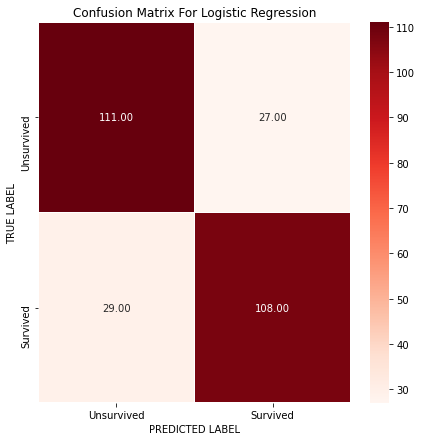

In [61]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['Unsurvived','Survived']
y_axis_labels=['Unsurvived','Survived']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [62]:
#checking ROC_AUC Score of Logistic Regression:
roc_auc_score(y_test,lr.predict(x_test))

0.7963344969850841

- ##### Decision Tree Classifier :

In [63]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")


=======================Train Result===========================
Accuracy score:98.54%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.976134    0.995050  0.985419    0.985592      0.985603
recall       0.995134    0.975728  0.985419    0.985431      0.985419
f1-score     0.985542    0.985294  0.985419    0.985418      0.985418
support    411.000000  412.000000  0.985419  823.000000    823.000000
________________________________________________________________
 Confusion Matrix:
[[409   2]
 [ 10 402]]



In [64]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n") 


=======================Test Result of dt_clf===========================
Accuracy score:81.09%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.802817    0.819549  0.810909    0.811183      0.811152
recall       0.826087    0.795620  0.810909    0.810854      0.810909
f1-score     0.814286    0.807407  0.810909    0.810847      0.810859
support    138.000000  137.000000  0.810909  275.000000    275.000000
________________________________________________________________
 Confusion Matrix:
[[114  24]
 [ 28 109]]



- The Accuracy Score of Decision Tree Classifier is 81.09%



Let's plot the Confusion matrix of Decision Tree Classifier for Visualization:

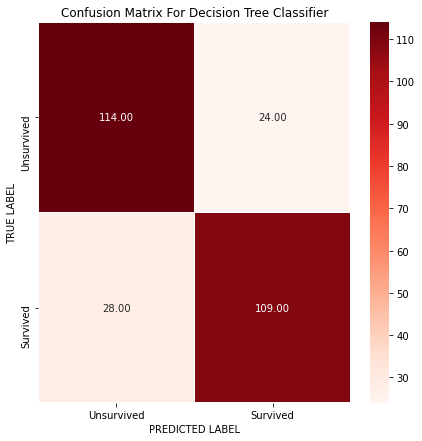

In [65]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['Unsurvived','Survived']
y_axis_labels=['Unsurvived','Survived']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [66]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.8108536972389717

- #####  Random Forest Classifier :

In [67]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:98.42%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.980676    0.987775  0.984204    0.984226      0.984230
recall       0.987835    0.980583  0.984204    0.984209      0.984204
f1-score     0.984242    0.984166  0.984204    0.984204      0.984204
support    411.000000  412.000000  0.984204  823.000000    823.000000
________________________________________________________________
 Confusion Matrix:
[[406   5]
 [  8 404]]



In [68]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")      
      


=======================Test Result of RF_clf===========================
Accuracy score:82.18%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.802721    0.843750  0.821818    0.823236      0.823161
recall       0.855072    0.788321  0.821818    0.821697      0.821818
f1-score     0.828070    0.815094  0.821818    0.821582      0.821606
support    138.000000  137.000000  0.821818  275.000000    275.000000
________________________________________________________________
 Confusion Matrix:
[[118  20]
 [ 29 108]]



- The Accuracy Score of Random Forest Classifier is 82.18%



Let's plot the Confusion matrix of Random Forest Classifier for Visualization:

Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

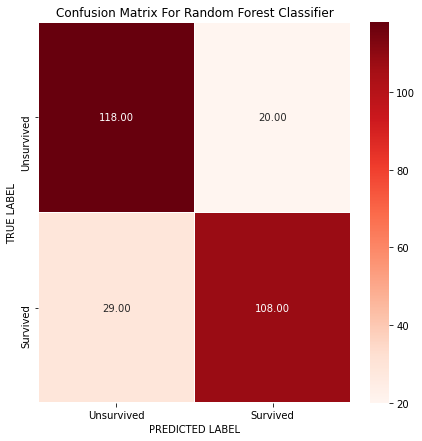

In [69]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['Unsurvived','Survived']
y_axis_labels=['Unsurvived','Survived']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [70]:
#ROC_AOC Score of Random Forest Classifier:

roc_auc_score(y_test,rf.predict(x_test))

0.8216968158256638

- ##### K-Neighbors Regressor:

In [71]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:86.88%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.859857    0.878109  0.868773    0.868983      0.868995
recall       0.880779    0.856796  0.868773    0.868787      0.868773
f1-score     0.870192    0.867322  0.868773    0.868757      0.868755
support    411.000000  412.000000  0.868773  823.000000    823.000000
________________________________________________________________
 Confusion Matrix:
[[362  49]
 [ 59 353]]



In [72]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      
      


=======================Test Result of KNN_clf===========================
Accuracy score:81.82%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.801370    0.837209  0.818182    0.819290      0.819224
recall       0.847826    0.788321  0.818182    0.818074      0.818182
f1-score     0.823944    0.812030  0.818182    0.817987      0.818009
support    138.000000  137.000000  0.818182  275.000000    275.000000
________________________________________________________________
 Confusion Matrix:
[[117  21]
 [ 29 108]]



- The Accuracy Score of K-Neighbors Regressor is 81.82%



Let's plot the Confusion matrix of K-Neighbors Regressor for Visualization:

Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

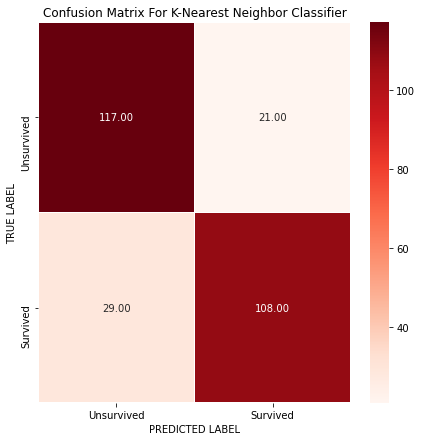

In [73]:
cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['Unsurvived','Survived']
y_axis_labels=['Unsurvived','Survived']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [74]:
#ROC_AUC Score of K-Nearest Kneibors Classifier:

roc_auc_score(y_test,kn.predict(x_test))

0.8180736274198667

- #####  Support Vector Classifier:

In [75]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")


=======================Train Result===========================
Accuracy score:81.77%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.779443    0.867978   0.81774    0.823710      0.823764
recall       0.885645    0.750000   0.81774    0.817822      0.817740
f1-score     0.829157    0.804688   0.81774    0.816922      0.816907
support    411.000000  412.000000   0.81774  823.000000    823.000000
________________________________________________________________
 Confusion Matrix:
[[364  47]
 [103 309]]



In [76]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print("\n=======================Test Result of SVC===========================")
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")      
      


=======================Test Result of SVC===========================
Accuracy score:82.18%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.773006    0.892857  0.821818    0.832932      0.832714
recall       0.913043    0.729927  0.821818    0.821485      0.821818
f1-score     0.837209    0.803213  0.821818    0.820211      0.820273
support    138.000000  137.000000  0.821818  275.000000    275.000000
________________________________________________________________
 Confusion Matrix:
[[126  12]
 [ 37 100]]



- The Accuracy Score of Support Vector Classifier  is 82.18%


Let's plot the Confusion matrix of Support Vector Classifier for Visualization:

Text(0.5, 1.0, 'Confusion Matrix Of SVC')

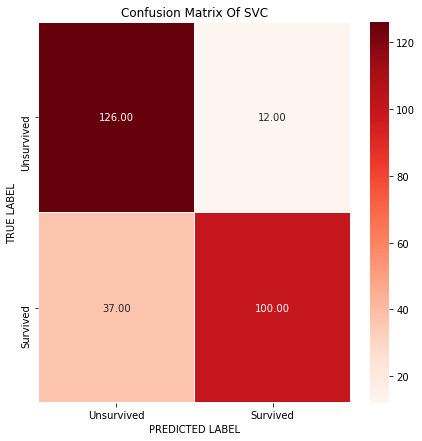

In [77]:
cm = confusion_matrix(y_test,svc_pred)

x_axis_labels=['Unsurvived','Survived']
y_axis_labels=['Unsurvived','Survived']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of SVC')

In [78]:
#ROC_AUC Score of SVC:
roc_auc_score(y_test,svc.predict(x_test))

0.8214852427800698

- ##### Gradient Boosting Classifier:

In [79]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:90.16%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.880184    0.925450   0.90158    0.902817      0.902845
recall       0.929440    0.873786   0.90158    0.901613      0.901580
f1-score     0.904142    0.898876   0.90158    0.901509      0.901506
support    411.000000  412.000000   0.90158  823.000000    823.000000
________________________________________________________________
 Confusion Matrix:
[[382  29]
 [ 52 360]]



In [80]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n") 


=======================Test Result===========================
Accuracy score:84.36%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.841727    0.845588  0.843636    0.843657      0.843650
recall       0.847826    0.839416  0.843636    0.843621      0.843636
f1-score     0.844765    0.842491  0.843636    0.843628      0.843632
support    138.000000  137.000000  0.843636  275.000000    275.000000
________________________________________________________________
 Confusion Matrix:
[[117  21]
 [ 22 115]]



- The Accuracy Score of Gradient Boosting Classifier is 84.36%



Let's plot the Confusion matrix of Gradient Boosting Classifier for Visualization:

Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

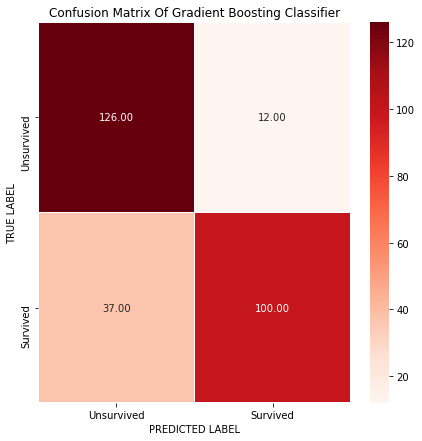

In [81]:
cm = confusion_matrix(y_test,svc_pred)

x_axis_labels=['Unsurvived','Survived']
y_axis_labels=['Unsurvived','Survived']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [82]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,gbdt_clf.predict(x_test))

0.8436210726753413

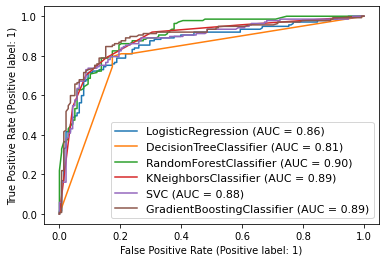

In [83]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

- ###### As we can see Random Forest Classifier is giving the best Accuracy of all the 6 models.

- ##### Cross validation :

 Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.


In [51]:
#Checking Cross Validation score for Logistic Regression:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:78.87%


In [52]:
#Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:80.15%


In [53]:
#Checking Cross Validation
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:81.79%


In [54]:
# Checking Cross Validation Score of KNN:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:81.16%


In [55]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:81.25%


In [56]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:82.98%


Now let's check the difference between Acuuracy Score and Cross Validation Score to select the best model from the 6 models:

- Diffrence betwwwn Accuracy score and Cross Validation Score of 6 different models :
- LR = 79.64-78.87 = 0.77 
- DT = 81.09-80.15 = 0.94 
- Rf = 82.18-81.79 = 0.39 
- KNN = 81.82-81.16 = 0.66 
- SVC = 82.18-81.25 = 0.93
- Gbdt_clf = 84.36-82.98 = 1.38

So, as the difference of Accuracy Score and CV of Random Forest Classifier is least, it's the best Model. Let's do Hyperparameter Tuning of RFC.


- ##### Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter ofRandom Forest Classifier model. After getting the best parameters we can put those into the model to obtain best accuracy.

In [87]:
rf = RandomForestClassifier()
params={'n_estimators':[12,13,15,17],
       'criterion':['entropy','gini'],
       'max_depth':[10,13,15,17],
       'min_samples_split':[10,12,11,13],
       'min_samples_leaf':[4,5,6,8]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 17}
con_mat=>  
 [[119  19]
 [ 29 108]]
Accuracy of rf After Hyperparameter Tuning==>  82.54545454545455


- The first row of confusion matrix is about the unsurvived-predictions: 119 passengers were correctly classified as not survived (called true negatives) and 19 where wrongly classified as not survived (false positives).
- The second row is about the survived-predictions: 29 passengers where wrongly classified as survived (false negatives) and 108 where correctly classified as survived (true positives).

In [88]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       138
           1       0.85      0.79      0.82       137

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



- So, after hyperparameter tuning the Accuracy Score of Random Forest Classifier is 83% Where as Cross Validation Score is less (81.79%) And the Accuracy Score without parameter tuning is 82.18%. So we can say that after parameter tuning Random Forest Classifier is giving the best accuracy(83%).

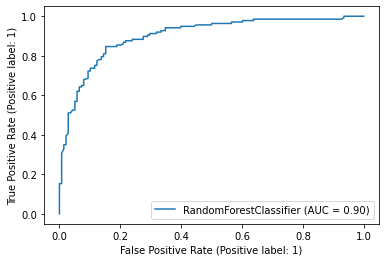

In [89]:
disp = plot_roc_curve(rfc,x_test,y_test)

- As we can see above, the ROC_AUC curve of Random Forest Classifier after Hyperparameter tuning. 



- So, it's time to do model prediction using Random Forest Classifier.

In [91]:
# model prediction using RF
x_predict = list(rfc.predict(x_test))
rfc_titanic = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rfc_titanic))

     predicted_values  orignal_values
44                  1               1
570                 1               1
56                  1               1
602                 0               0
830                 0               0
..                ...             ...
868                 0               0
381                 0               0
812                 0               0
467                 0               0
60                  0               0

[275 rows x 2 columns]


In [93]:
#import joblib
import joblib

joblib.dump(rfc,'rfc_titanic_file.obj')

# SAVING THE MODEL

['rfc_titanic_file.obj']

In [94]:
rfc_from_joblib=joblib.load('rfc_titanic_file.obj')
rfc_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

- ##### Conclusion:

 This Titanic dataset provides information on the fate of passengers on the Titanic, summarized according to socio-economic status(class), sex, age and survival. We have analyzed that lower class passengers were more likely unsurvived than upperclass passengers.
 This dataset contains various dtypes of columns. For that we use various methods to analyze those as much as possible.
 We have seen that there were so many null values, we cleaned those,
 We have used Seaborn and matplotlib libraries for visualization for analysis of the data.
 We have used most of the required features for predicting the survived data. As our models do not understand the nominal data we need to encode some of them and we need to drop off some of them as well, as they were not relatable with the prediction of Survived data.
  Afterwards we started training 6 different machine learning models, Checked cross validation score then picked one of them (random forest classifier ) based on it's accuracy and tune with it's best parameters and obtained the best accuracy of 83%.